In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from time import time

import cv2

# Load the photo
img        = cv2.imread('hotspot.png')
orig       = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [2]:
# Reducing image file

# -- get the width and height of the current image
#    and reduce it by 1/4
newx,newy = orig.shape[1]/4, orig.shape[0]/4 #new size (w,h)

# -- use this new value to resize the image
orig      = cv2.resize(orig,(newx,newy))

Red Channel


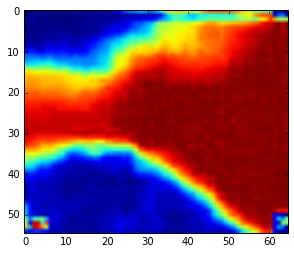

Green Channel


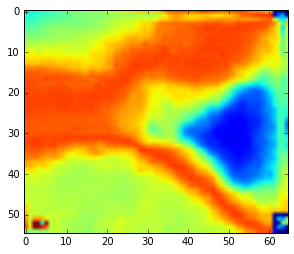

Blue Channel


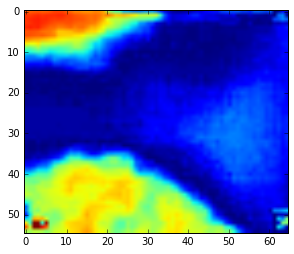

In [3]:
# To get the true color channel to reflect on the
# plot, you have to set the colormap of the plot.
print 'Red Channel'
plt.imshow(orig[0:,0:,0])
plt.show()

print 'Green Channel'
plt.imshow(orig[0:,0:,1])
plt.show()

print 'Blue Channel'
plt.imshow(orig[0:,0:,2])
plt.show()

In [4]:
# in order for us to perform dbscan on an image, we have to convert the image
# into a "training set" format.
# For this application our goal is transform a 3D into the following single line array consisting of the following:
# array = [  [ x-coordinate,
#              y-coordinate,
#              pixel value of the current channel at the particular (x,y) coordinate]........
#        ]

# x1 - flattened x pixel coordinate
# y1 - flattened y pixel coordinate
# z1 - flattened green channel values

# We'll use the Green channel for this particular application
ys, xs = np.mgrid[orig.shape[0]:0:-1, 0:orig.shape[1]]
x1 = xs.flatten()
y1 = ys.flatten()
z1 = orig[0:,0:,1].flatten()



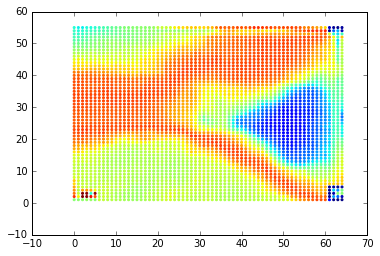

In [5]:
# Now the format allows us to plot the data as a scatterplot
# the image is dotted because we reduced the image size
plt.scatter(x1, y1, s=4,c=z1, edgecolor='face')

In [6]:
# combine x,y pixel coordinate data and z1 single color data into one array
# this one array will be fed to DBSCAN
new = []
for i in range(len(orig[0:,0:,1].flatten())):
    new.append([x1[i],y1[i],z1[i]])

In [7]:
# Perform dbscan
db = DBSCAN(eps=5, min_samples=7).fit(new)
labels = db.labels_

In [8]:
# We get the number of cluster that DBSCAN has found
from collections import Counter
Counter(labels)

Counter({-1: 287,
         0: 2076,
         1: 23,
         2: 70,
         3: 6,
         4: 298,
         5: 4,
         6: 9,
         7: 7,
         8: 29,
         9: 7,
         10: 22,
         11: 678,
         12: 6,
         13: 7,
         14: 5,
         15: 8,
         16: 7,
         17: 7,
         18: 7,
         19: 12})

In [9]:
# Get the unique labels of the results
unique_labels = set(labels)

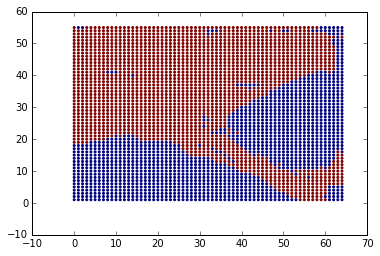

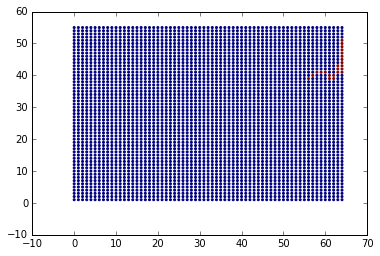

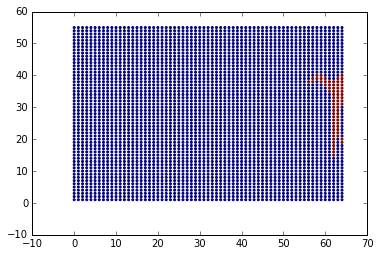

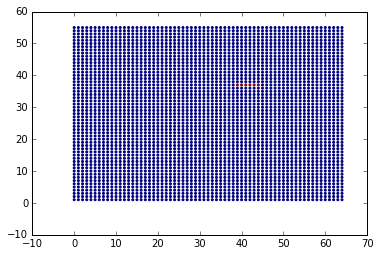

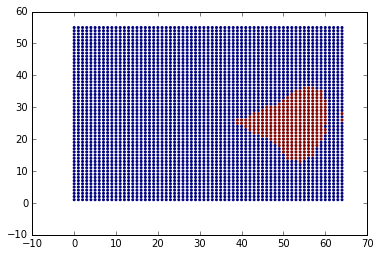

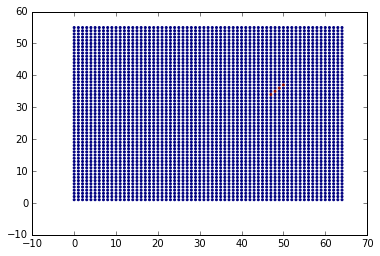

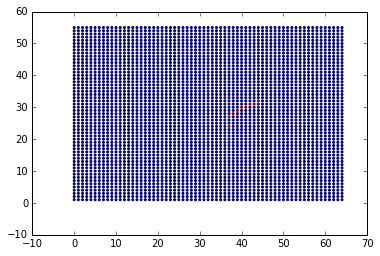

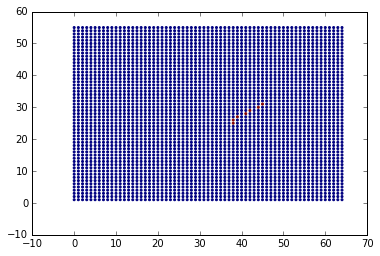

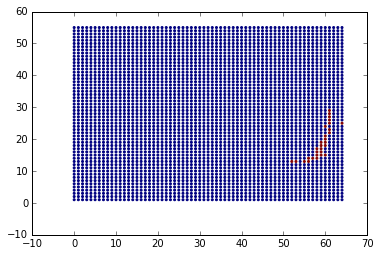

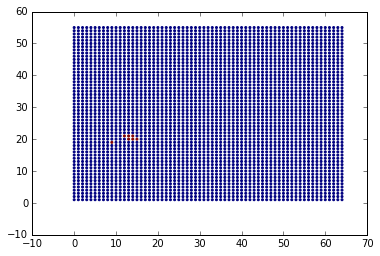

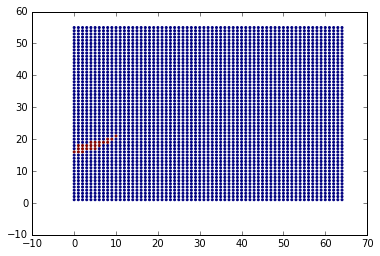

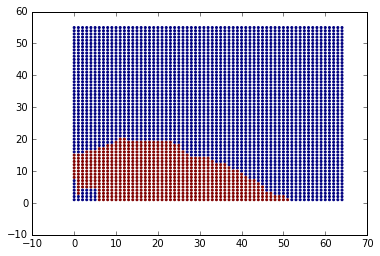

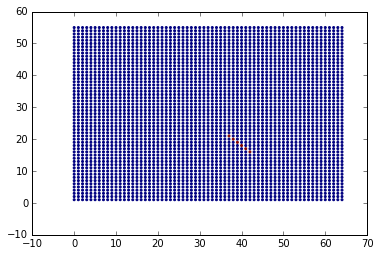

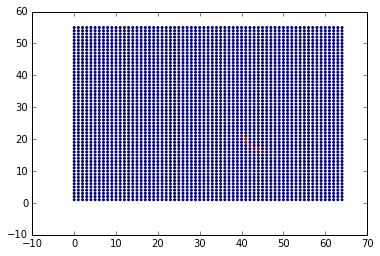

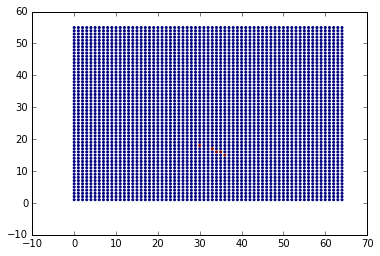

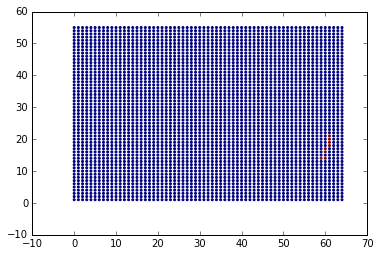

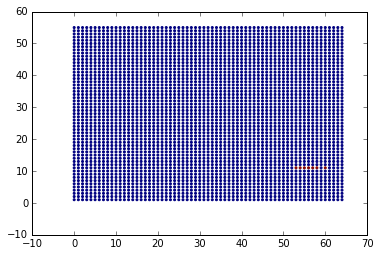

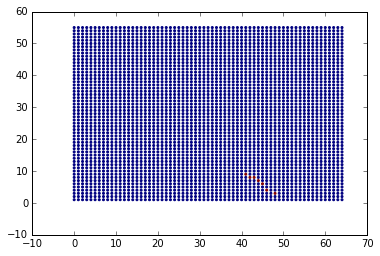

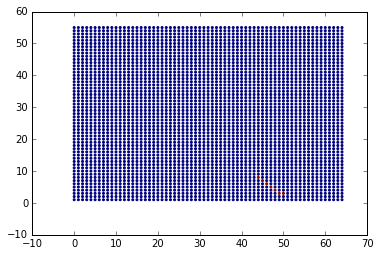

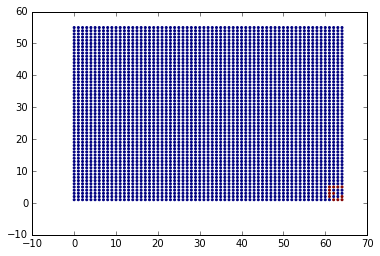

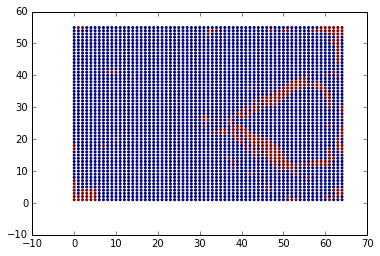

In [10]:
# We then plot the image for every cluster identified by DBSCAN

for j in unique_labels:
    colormap = []
    for i in labels:
        if i != j:
            colormap.append(0)
        else:
            colormap.append(254)
    plt.scatter(xs.flatten(), ys.flatten(), s=4,c=colormap, edgecolor='face')
    plt.show()
    